In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/peer-to-peer-dress-rental-prices/dress_rental_prices.csv


In [2]:
# Step One: PREPARE THE ENVIRONMENT(libraries)
import numpy as np
import pandas as pd
import datetime as dt

# matplotlib is for graphs/ seaborn is also for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# style for graphs is "ggplot"
plt.style.use('ggplot')

# set option to see all the columns
# pd.set_option('max_column')

# I want to get insights on how the dresses are priced
# Are they priced high based on type of clothing? Designer?

In [3]:
# import the data (make sure you specify which files you want. In this case,
# there is only one file)

# create a new dataframe(df)

df = pd.read_csv('/kaggle/input/peer-to-peer-dress-rental-prices/dress_rental_prices.csv')

In [4]:
# Let's look at the dataset to see how many columns/rows

df.shape

(29997, 7)

In [5]:
# We have 29997 rows and 7 columns. Lets check the name of the columns

df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Brand', 'Colour', 'Catagories', 'Price'], dtype='object')

In [6]:
# Let's look at the information inside the columns. Show a preview with the 'head' function

df.head(10)

# We need to understand what the columns are about. If you are working with a team 
# for a company, we can ask what the columns are about and what the information means

,Unnamed: 0,ID,Name,Brand,Colour,Catagories,Price
0,0,74416,Runway stripe dress,Stella McCartney,beige,dresses,111
1,1,73815,Reformation Kourtney Dress,Reformation,beige,dresses,50
2,2,73801,Ivory Viola bridal dress,Ghost,beige,dresses,75
3,3,73718,Pasu Dress - Rhino Tusk,Coucoo,beige,dresses,37
4,4,73605,Ellen,RIXO,beige,dresses,47
5,5,73583,Elena Dress Crystal Garden,Stine Goya,beige,dresses,64
6,6,73007,OBlanc Dress,New Arrivals,beige,dresses,145
7,7,73245,Melody Dress,Melissa Odabash,beige,dresses,52
8,8,73050,Isamaya Dress,Rat & Boa,beige,dresses,38
9,9,73019,Belted Animal Print Mini Dress,ROTATE BIRGER CHRISTENSEN,beige,dresses,39


In [7]:
# what are the data types for each columns

df.dtypes

# int64 is a number, object is a string (str)

Unnamed: 0     int64
ID             int64
Name          object
Brand         object
Colour        object
Catagories    object
Price          int64
dtype: object

In [8]:
#Step Two: CLEAN THE DATA
# We only need to reformat the 'ID' column to a 
# string so that Pandas/Python won't make calculations
#Date transformations: df['Date'] = pd.to.datetime(df['Date'], format = '%m,%d,%y')

df['ID'] = df['ID'].astype(str) 
df.dtypes

Unnamed: 0     int64
ID            object
Name          object
Brand         object
Colour        object
Catagories    object
Price          int64
dtype: object

In [9]:
#Check the values inside the columns
#Are there any duplicate IDs?

df['ID'].value_counts()

#No duplicate found

ID
74416    1
57563    1
56429    1
56450    1
56485    1
        ..
72999    1
74328    1
73581    1
73077    1
231      1
Name: count, Length: 29997, dtype: int64

In [10]:
# Rename the columns ( change to lowercase for simplicity)
# Rename: df.rename(columns = {'ID':'identity', 'name':'title'}, inplace = True)  ...
# check False first

df.columns = df.columns.str.lower()
df.columns

Index(['unnamed: 0', 'id', 'name', 'brand', 'colour', 'catagories', 'price'], dtype='object')

In [11]:
df.rename(columns = {'catagories':'category'}, inplace = True)

In [12]:
#create columns if necessary
df.head(4)

,unnamed: 0,id,name,brand,colour,category,price
0,0,74416,Runway stripe dress,Stella McCartney,beige,dresses,111
1,1,73815,Reformation Kourtney Dress,Reformation,beige,dresses,50
2,2,73801,Ivory Viola bridal dress,Ghost,beige,dresses,75
3,3,73718,Pasu Dress - Rhino Tusk,Coucoo,beige,dresses,37


In [13]:
#checking null values

df.isna()

,unnamed: 0,id,name,brand,colour,category,price
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
29992,False,False,False,False,False,False,False
29993,False,False,False,False,False,False,False
29994,False,False,False,False,False,False,False
29995,False,False,False,False,False,False,False


In [14]:
df.isna().sum()

unnamed: 0      0
id              0
name            2
brand           0
colour          0
category      114
price           0
dtype: int64

In [15]:
df.isnull().sum()
#same functions

unnamed: 0      0
id              0
name            2
brand           0
colour          0
category      114
price           0
dtype: int64

In [16]:
# Find the null values and delete or fix

null_mask = df.isnull().any(axis=1)
null_rows = df[null_mask]

print(null_rows)

       unnamed: 0     id                          name            brand  \
174           174  61602         Terri Dress in Bobcat      Reformation   
175           175  65649              Twill Mini Dress        Courrèges   
713           713  33095            Cottage Puff Dress           Selkie   
799           799  27801               Andromeda Gown   Needle & Thread   
806           806  28033                         Dress          ALEMAIS   
...           ...    ...                           ...              ...   
28060       28060  55593  Aubrielle white sequin dress        Retrofête   
28233       28233   8496         Wavelength Midi Dress       Zimmermann   
28980       28980  26082                    NEVA DRESS             ILTA   
29202       29202  65643           Silk Provence Dress      Reformation   
29203       29203  65634      ruffled tulle midi dress    Molly Goddard   

       colour category  price  
174     beige      NaN     41  
175     beige      NaN     97  
713

In [17]:
# subset the data ( you don't want to completely delete raw data)

df.dropna(subset =['category'], inplace=True)
df.dropna(subset =['name'], inplace=True)
print(df)

       unnamed: 0     id                                    name  \
0               0  74416                     Runway stripe dress   
1               1  73815              Reformation Kourtney Dress   
2               2  73801                Ivory Viola bridal dress   
3               3  73718                 Pasu Dress - Rhino Tusk   
4               4  73605                                   Ellen   
...           ...    ...                                     ...   
29992       29992    872  Silk and wool-blend crepe dress yellow   
29993       29993    871                 La Guardia Matching Set   
29994       29994    844   One-shoulder ruffled crepe mini dress   
29995       29995    592                            Billie Dress   
29996       29996    231   Yellow Maddie Striped-knit Mini Dress   

                     brand  colour  \
0         Stella McCartney   beige   
1              Reformation   beige   
2                    Ghost   beige   
3                   Coucoo   be

In [18]:
# checking duplicates
df.duplicated().sum()

0

In [19]:
df['category'].str.contains('dresses')


0        True
1        True
2        True
3        True
4        True
         ... 
29992    True
29993    True
29994    True
29995    True
29996    True
Name: category, Length: 29881, dtype: bool

In [20]:
# Assuming the color column in your dataframe is 'colour'
# Define the mapping of colors to categories
color_map = {
    'beige': 'Neutrals', 'cream': 'Neutrals', 'grey': 'Neutrals', 'white': 'Neutrals',
    'black': 'Blacks & Darks', 'phantom': 'Blacks & Darks', 'navy': 'Blacks & Darks',
    'brown': 'Browns & Earth Tones', 'copper': 'Browns & Earth Tones',
    'gold': 'Metallics', 'silver': 'Metallics',
    'blue': 'Blues',
    'green': 'Greens',
    'orange': 'Brights & Vibrant', 'pink': 'Brights & Vibrant', 'purple': 'Brights & Vibrant', 'red': 'Brights & Vibrant', 'yellow': 'Brights & Vibrant',
    'multi': 'Prints and Patterns'
}

# Map the colors in the DataFrame to their categories
df['color_category'] = df['colour'].map(color_map)

# Clean data if necessary (e.g., remove or handle nulls, duplicates)
df.dropna(subset=['category', 'name'], inplace=True)

# Group by 'Color Category' to see the number of dresses in each category
category_counts = df.groupby('color_category').size()

# Optional: Print out the category counts to see the distribution
print(category_counts)


color_category
Blacks & Darks          5466
Blues                   3562
Brights & Vibrant       8194
Browns & Earth Tones     733
Greens                  2850
Metallics                829
Neutrals                4065
Prints and Patterns     4152
dtype: int64


In [21]:
#Step Three: ANALYSIS

#Categories

# mass_market: These brands focus on offering the latest trends and 
#              styles at lower pries, often with a faster fashion cycle.
#              less than ... on average

# mid_range: These brands offer quality and style at a more 
#            accessible price point compared to luxury brands.
#            between ... and ... on average

# high_end: These items are associated with high-quality materials,
#           expert craftsmanshiop, and a premium price point.
#           more than ... on average >=

#

total_unique_count = df['name'].value_counts().size
print(total_unique_count)
df.head(10)


25497


,unnamed: 0,id,name,brand,colour,category,price,color_category
0,0,74416,Runway stripe dress,Stella McCartney,beige,dresses,111,Neutrals
1,1,73815,Reformation Kourtney Dress,Reformation,beige,dresses,50,Neutrals
2,2,73801,Ivory Viola bridal dress,Ghost,beige,dresses,75,Neutrals
3,3,73718,Pasu Dress - Rhino Tusk,Coucoo,beige,dresses,37,Neutrals
4,4,73605,Ellen,RIXO,beige,dresses,47,Neutrals
5,5,73583,Elena Dress Crystal Garden,Stine Goya,beige,dresses,64,Neutrals
6,6,73007,OBlanc Dress,New Arrivals,beige,dresses,145,Neutrals
7,7,73245,Melody Dress,Melissa Odabash,beige,dresses,52,Neutrals
8,8,73050,Isamaya Dress,Rat & Boa,beige,dresses,38,Neutrals
9,9,73019,Belted Animal Print Mini Dress,ROTATE BIRGER CHRISTENSEN,beige,dresses,39,Neutrals


In [22]:
#There are 931 different brands
#There are 20 different colours
#There are 5399 different categories (They are all dresses)
#There are 29881 different ids
#There are 25497 different names

category_values = df['category'].unique()
print(category_values)



['dresses' 'dresses, midi' 'bottoms' ...
 'dresses, Vinyl-PVC-Synthetics, Smart, Formal, Winter, Seasonal, mini, V-Necks'
 'dresses, Cotton-Jersey, Tie-Front, Skinny-Fit, Smart, Formal, Summer, midi, Pencil, Monochrome'
 'dresses, Wool-Cashmere, Horizontal Stripe, Casual, Winter, mini, Short Sleeve']


In [23]:
#Categories

# mass_market: These brands focus on offering the latest trends and 
#              styles at lower pries, often with a faster fashion cycle.
#              less than 75 on average

# mid_range: These brands offer quality and style at a more 
#            accessible price point compared to luxury brands.
#            between 75 and 300 on average

# high_end: These items are associated with high-quality materials,
#           expert craftsmanshiop, and a premium price point.
#           more than 300 on average 

#The following was corrected by ChatGPT. I see how it grouped everything into one command
#id_grp = df.groupby(['id'])
#id_avg_price = id_grp['price'].mean().sort_values(ascending=False)
#id_ave_price = id_avg_price.to_frame()

# Group by 'id' and calculate the mean price for each id
id_avg_price = df.groupby('id')['price'].mean().sort_values(ascending=False).to_frame()

# Rename the column to 'average_price' for clarity
id_avg_price.rename(columns={'price': 'average_price'}, inplace=True)


#Define conditions for fashion levels (Create conditions)
conditions = [
    (id_avg_price['average_price'] <= 75),
    (id_avg_price['average_price'] > 75) & (id_avg_price['average_price'] < 300),
   (id_avg_price['average_price'] >= 300)]

#Define the category labels
categories = ['mass_market', 'mid_range', 'high_end']

# Create a column
id_avg_price['fashion_level'] = np.select(conditions, categories)

#Storing column on a variable
id_fashion_level = id_avg_price['fashion_level']

#Display the DataFrame
print(id_avg_price.head(10))

       average_price fashion_level
id                                
64660          793.0      high_end
30777          707.0      high_end
69601          653.0      high_end
58691          618.0      high_end
71102          588.0      high_end
28666          576.0      high_end
49933          572.0      high_end
11280          552.0      high_end
60146          503.0      high_end
45778          503.0      high_end


In [24]:
#How many high end, mig range, and mass market do we have?

category_counts = id_avg_price['fashion_level'].value_counts()

# Display the counts
print(category_counts)

#Note that the company sells more mass_market clothing than anything.

fashion_level
mass_market    23973
mid_range       5846
high_end          62
Name: count, dtype: int64


In [25]:
# Assuming 'id_avg_price' has 'id' as its index after groupby operation
# You might need to reset the index if 'id' is not a column
id_avg_price.reset_index(inplace=True)

# Merging 'df' with 'id_avg_price'
df_merged = pd.merge(df, id_avg_price, on='id', how='inner')

# Display the first few rows to verify the merge
print(df_merged.head())

   unnamed: 0     id                        name             brand colour  \
0           0  74416         Runway stripe dress  Stella McCartney  beige   
1           1  73815  Reformation Kourtney Dress       Reformation  beige   
2           2  73801    Ivory Viola bridal dress             Ghost  beige   
3           3  73718     Pasu Dress - Rhino Tusk            Coucoo  beige   
4           4  73605                       Ellen              RIXO  beige   

  category  price color_category  average_price fashion_level  
0  dresses    111       Neutrals          111.0     mid_range  
1  dresses     50       Neutrals           50.0   mass_market  
2  dresses     75       Neutrals           75.0   mass_market  
3  dresses     37       Neutrals           37.0   mass_market  
4  dresses     47       Neutrals           47.0   mass_market  


In [26]:
#I previously removed the column 'unnamed: 0' 
# Remove the column named 'unwanted_column'
df_merged = df_merged.drop('unnamed: 0', axis=1)

In [27]:
# Display the first few rows of the merged DataFrame to check the new 'fashion_level' column
print(df_merged.head())


      id                        name             brand colour category  price  \
0  74416         Runway stripe dress  Stella McCartney  beige  dresses    111   
1  73815  Reformation Kourtney Dress       Reformation  beige  dresses     50   
2  73801    Ivory Viola bridal dress             Ghost  beige  dresses     75   
3  73718     Pasu Dress - Rhino Tusk            Coucoo  beige  dresses     37   
4  73605                       Ellen              RIXO  beige  dresses     47   

  color_category  average_price fashion_level  
0       Neutrals          111.0     mid_range  
1       Neutrals           50.0   mass_market  
2       Neutrals           75.0   mass_market  
3       Neutrals           37.0   mass_market  
4       Neutrals           47.0   mass_market  


In [28]:
df.head(10)

,unnamed: 0,id,name,brand,colour,category,price,color_category
0,0,74416,Runway stripe dress,Stella McCartney,beige,dresses,111,Neutrals
1,1,73815,Reformation Kourtney Dress,Reformation,beige,dresses,50,Neutrals
2,2,73801,Ivory Viola bridal dress,Ghost,beige,dresses,75,Neutrals
3,3,73718,Pasu Dress - Rhino Tusk,Coucoo,beige,dresses,37,Neutrals
4,4,73605,Ellen,RIXO,beige,dresses,47,Neutrals
5,5,73583,Elena Dress Crystal Garden,Stine Goya,beige,dresses,64,Neutrals
6,6,73007,OBlanc Dress,New Arrivals,beige,dresses,145,Neutrals
7,7,73245,Melody Dress,Melissa Odabash,beige,dresses,52,Neutrals
8,8,73050,Isamaya Dress,Rat & Boa,beige,dresses,38,Neutrals
9,9,73019,Belted Animal Print Mini Dress,ROTATE BIRGER CHRISTENSEN,beige,dresses,39,Neutrals


In [29]:
df_merged.head(10)

,id,name,brand,colour,category,price,color_category,average_price,fashion_level
0,74416,Runway stripe dress,Stella McCartney,beige,dresses,111,Neutrals,111.0,mid_range
1,73815,Reformation Kourtney Dress,Reformation,beige,dresses,50,Neutrals,50.0,mass_market
2,73801,Ivory Viola bridal dress,Ghost,beige,dresses,75,Neutrals,75.0,mass_market
3,73718,Pasu Dress - Rhino Tusk,Coucoo,beige,dresses,37,Neutrals,37.0,mass_market
4,73605,Ellen,RIXO,beige,dresses,47,Neutrals,47.0,mass_market
5,73583,Elena Dress Crystal Garden,Stine Goya,beige,dresses,64,Neutrals,64.0,mass_market
6,73007,OBlanc Dress,New Arrivals,beige,dresses,145,Neutrals,145.0,mid_range
7,73245,Melody Dress,Melissa Odabash,beige,dresses,52,Neutrals,52.0,mass_market
8,73050,Isamaya Dress,Rat & Boa,beige,dresses,38,Neutrals,38.0,mass_market
9,73019,Belted Animal Print Mini Dress,ROTATE BIRGER CHRISTENSEN,beige,dresses,39,Neutrals,39.0,mass_market


In [30]:
#How many of each different colour do we have?

colour_counts = df_merged['colour'].value_counts()

# Display the counts
print(colour_counts)

#Note that the company sells more black clothing than anything.
#However, none of the colours are outliers
#They may consider merging colour categories to cut back on choices
#For an example merging tan, beige, cream, and white

colour
black      4670
multi      4152
blue       3562
pink       3478
green      2850
white      2323
red        2257
beige      1103
yellow      942
purple      811
navy        780
orange      706
brown       615
cream       525
gold        466
silver      363
copper      118
grey        114
tan          30
phantom      16
Name: count, dtype: int64


In [31]:
#How many of each different colour do we have?

name_counts = df_merged['name'].value_counts()

# Display the counts
print(name_counts)

#Note that there are 38 items that don't have a dress name.
#We need to delete these values.

name
Dress                                    38
The Alexandra Dress                      33
Atlanta Linen Dress                      26
Nikita Dress                             22
Isabella Dress                           22
                                         ..
Rehannin                                  1
Boucle embellished dress                  1
Wendelin Dress                            1
Bridgette 'Dice'                          1
Yellow Maddie Striped-knit Mini Dress     1
Name: count, Length: 25497, dtype: int64


In [32]:
#Delete the values that don't have a name

# Assuming df_merged is your current DataFrame
# Filter out rows where 'name' column is exactly 'Dress'
df_filtered = df_merged[df_merged['name'] != 'Dress']

# Verify that no rows named 'Dress' are left
print(df_filtered[df_filtered['name'] == 'Dress'].shape[0])

0


In [33]:
# Display the first 10 rows of the filtered DataFrame
print(df_filtered.head(10))

      id                            name                      brand colour  \
0  74416             Runway stripe dress           Stella McCartney  beige   
1  73815      Reformation Kourtney Dress                Reformation  beige   
2  73801        Ivory Viola bridal dress                      Ghost  beige   
3  73718         Pasu Dress - Rhino Tusk                     Coucoo  beige   
4  73605                           Ellen                       RIXO  beige   
5  73583     Elena Dress Crystal Garden                  Stine Goya  beige   
6  73007                   OBlanc Dress                New Arrivals  beige   
7  73245                    Melody Dress            Melissa Odabash  beige   
8  73050                   Isamaya Dress                  Rat & Boa  beige   
9  73019  Belted Animal Print Mini Dress  ROTATE BIRGER CHRISTENSEN  beige   

  category  price color_category  average_price fashion_level  
0  dresses    111       Neutrals          111.0     mid_range  
1  dresses   

In [34]:
df_filtered.describe()

,price,average_price
count,29843.000000,29843.000000
mean,61.558791,61.558791
std,38.007480,38.007480
min,11.000000,11.000000
25%,40.000000,40.000000
50%,51.000000,51.000000
75%,69.000000,69.000000
max,793.000000,793.000000


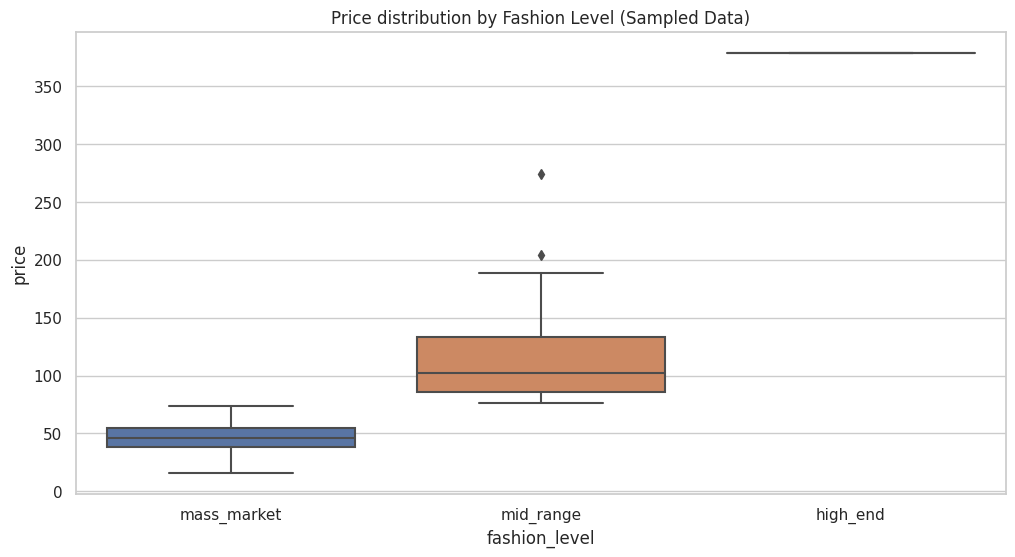

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_filtered has already been defined and contains the necessary data

# Sample 10% of the data randomly
df_sample = df_filtered.sample(n=380, random_state=42)

# Setting the plot style and size
plt.figure(figsize=(12, 6))  # Adjust the size as needed
sns.set(style="whitegrid")  # This sets the style of the plot to have a white grid background

# Create a box plot
sns.boxplot(x='fashion_level', y='price', data=df_sample)

# Adding titles and labels to enhance clarity
plt.title('Price distribution by Fashion Level (Sampled Data)')
plt.xlabel('fashion_level')
plt.ylabel('price')

# Display the plot
plt.show()

# This doesn't work because the price is already correlated to fashion_level

In [36]:
import plotly.express as px

# If the dataset is large, consider sampling here as well
colour_counts = df_filtered['colour'].value_counts().reset_index()
colour_counts.columns = ['colour', 'frequency']

# Create a bar chart using Plotly
fig = px.bar(colour_counts, x='colour', y='frequency', title='Frequency of Dress Colours')
fig.update_layout(xaxis_title='Colour',
                  yaxis_title='Frequency',
                  xaxis={'categoryorder':'total descending'})  # Sort bars by descending order
fig.show()

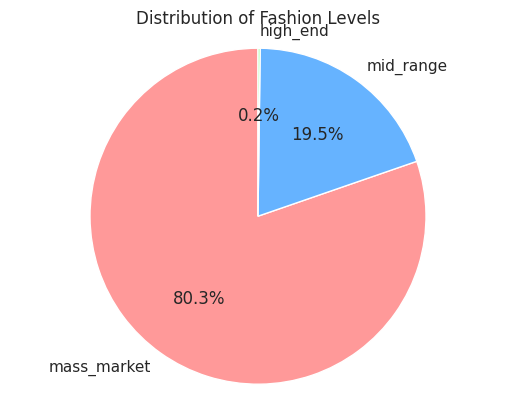

In [37]:
# Calculate the counts of each fashion level
fashion_level_counts = df_filtered['fashion_level'].value_counts()

# Define the labels from the index of the series
labels = fashion_level_counts.index
sizes = fashion_level_counts.values

# Define color palette
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']  # You can customize these colors

# Plotting the pie chart
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax1.axis('equal')

plt.title('Distribution of Fashion Levels')
plt.show()

In [38]:
summary_text = """ Analysis Summary of Dress Rental Prices

Data Overview:

	•	We analyzed a dataset consisting of 29,997 records of dress rentals, featuring information about dress names, brands, colors, categories, and prices.
	•	The dataset spanned various brands (931 unique brands) and colors (20 different colors), with a comprehensive pricing spectrum from low to high-end fashion items.

Key Insights:

	1.	Fashion Level Categorization:
	•	•	We categorized dresses into three fashion levels based on their prices:
	•	•	Mass Market: Prices less than $75.
	•	•	Mid Range: Prices between $75 and $300.
	•	•	High End: Prices above $300.
	•	•	The vast majority of items fell into the ‘Mass Market’ category, suggesting 
	•	•	that the rental service focuses predominantly on more affordable fashion.
        
	2.	Color Popularity:
	•	•	The color analysis revealed that black and blue dresses are the most 
•	•	•	frequently stocked colors, suggesting these colors are likely the 
    •	•	most popular or considered staple offerings in rental fashion.
	•	•	Conversely, less common colors included tan and phantom, indicating 
	•	•	niche preferences or seasonal trends.
	3.	Price Distribution:
	•	•	A detailed examination using box plots showed that ‘High End’ dresses
	•	•	not only varied significantly in price but also occasionally included 
	•	•	extremely high-cost items, possibly designer pieces or dresses with premium materials.
	•	•	‘Mass Market’ dresses exhibited the least price variation, aligning 
•	•	•	with the target market’s expectations for affordability.

Implications:

	•	The dominance of mass-market items points to a business model centered on 
	•	accessibility and broader appeal, potentially attracting a larger customer base.
	•	The popularity of specific colors like black and blue could inform 
	•	stock acquisition strategies, emphasizing these colors to meet demand.
	•	Pricing strategies appear well-segmented by fashion level, but there might 
	•	be room to explore the upper limits of mid-range pricing to maximize 
	•	revenue without encroaching on high-end territory.

Recommendations:

	•	Consider diversifying the color palette in the mid-range category to test consumer response to non-traditional colors, potentially increasing market share.
	•	Explore strategic promotions or featured collections for high-end dresses to enhance their visibility and attractiveness to consumers seeking luxury items.

Conclusion:
This analysis provides valuable insights into the operational dynamics of the dress rental market, highlighting consumer preferences and effective pricing strategies. Continued data monitoring and adjustment of inventory and pricing will be crucial to staying responsive to consumer trends and market conditions.

"""

print(summary_text)

 Analysis Summary of Dress Rental Prices

Data Overview:

	•	We analyzed a dataset consisting of 29,997 records of dress rentals, featuring information about dress names, brands, colors, categories, and prices.
	•	The dataset spanned various brands (931 unique brands) and colors (20 different colors), with a comprehensive pricing spectrum from low to high-end fashion items.

Key Insights:

	1.	Fashion Level Categorization:
	•	•	We categorized dresses into three fashion levels based on their prices:
	•	•	Mass Market: Prices less than $75.
	•	•	Mid Range: Prices between $75 and $300.
	•	•	High End: Prices above $300.
	•	•	The vast majority of items fell into the ‘Mass Market’ category, suggesting 
	•	•	that the rental service focuses predominantly on more affordable fashion.
        
	2.	Color Popularity:
	•	•	The color analysis revealed that black and blue dresses are the most 
•	•	•	frequently stocked colors, suggesting these colors are likely the 
    •	•	most popular or considered st

In [39]:
df_sample.shape

(380, 9)

In [40]:
df_filtered.shape

(29843, 9)

In [41]:
import math

# Parameters
confidence_level = 0.95
margin_of_error = 0.05
population_size = 29843

# Z-value for 95% confidence
z_value = 1.96  # from standard normal distribution table

# Assuming maximum variability (p = 0.5 for maximum sample size requirement)
p = 0.5

# Sample size calculation using the simplified formula
sample_size = (z_value**2 * p * (1 - p)) / (margin_of_error**2)

# Adjusting sample size for finite population
sample_size_corrected = sample_size / (1 + (sample_size - 1) / population_size)

# Rounding up because you can't have a fraction of a sample
final_sample_size = math.ceil(sample_size_corrected)

print(f"Recommended sample size: {final_sample_size}")

Recommended sample size: 380


In [42]:
# Check if the DataFrame has enough data
if len(df_filtered) >= 380:
    df_sample = df_filtered.sample(n=380, random_state=42)
else:
    print("DataFrame has fewer than 380 observations. Sampling the entire DataFrame instead.")
    df_sample = df_filtered.copy()  # Or handle as appropriate for your situation

In [43]:
import pandas as pd
df_sample.to_csv('dress_swap_sample.csv', index=False)